In [1]:
import yfinance as yahoofinance
import numpy as np
import matplotlib.pyplot
import math
import matplotlib.pyplot as plt
import time

In [105]:
stock = input()
data = yahoofinance.download(stock)
ticker = yahoofinance.Ticker(stock)
data = ticker.history(period="1y")
close = data.Close[-1]

KR
[*********************100%%**********************]  1 of 1 completed


In [106]:
sigma = data.Close.std()
sigma

1.7273369616234655

In [107]:
stock_price = close
strike_price = 22.5
put_strike = 22.5
days_to_expiration = 70
time_to_expiration = days_to_expiration/365
implied_volatility = sigma/100
up_factor = math.exp(implied_volatility * math.sqrt(time_to_expiration))
down_factor = 1/up_factor
interest_rate = 5.5/100
inflation = 3.1/100
risk_free_rate = interest_rate - inflation

In [108]:
down_factor

0.9924640487339541

In [109]:
nodes = 50

In [110]:
tree = np.zeros((nodes + 1, nodes + 1), dtype=float)

In [111]:
tree[0][0] = stock_price

In [112]:
# Populate the tree with values based on up and down factors
for i in range(1, nodes):
    for j in range(i + 1):
        if j == 0:
            # Down movement
            tree[i][j] = tree[i - 1][j] * down_factor
            tree[i][j-1] = tree[i - 1][j - 1] * up_factor
        else:
            # Up movement
            tree[i][j] = tree[i - 1][j - 1] * up_factor
            tree[i][j-1] = tree[i - 1][j - 1] * down_factor

In [113]:
tree

array([[46.04999924,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [45.70296869, 46.39966485,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [45.35855334, 46.04999924, 46.75198553, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [32.02869518, 32.51694069, 33.01262901, ..., 66.20945429,
         0.        ,  0.        ],
       [31.7873285 , 32.27189461, 32.76384744, ..., 65.71050307,
        66.71219414,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [114]:
#Visualize the binomial tree using matplotlib
#start_time = time.time()
#plt.figure(figsize=(100, 100))
#for i in range(nodes):
#    for j in range(i + 1):
#        plt.plot([j, j + 1], [nodes - i - 1, nodes - i], 'b', lw=2)
#        plt.plot([j, j - 1], [nodes - i - 1, nodes - i], 'r', lw=2)
#        plt.text(j, nodes - i - 0.5, f'{tree[i][j]:.2f}', ha='center', va='center')

#plt.xlabel('Time Step')
#plt.ylabel('Node')
#plt.title('Binomial Tree Visualization')
#plt.grid()
#plt.show()

#end_time = time.time()
#elapsed_time = end_time - start_time

#print(f"Execution took {elapsed_time:.2f} seconds")

In [115]:
exercise_stock_prices = tree[-2]
exercise_stock_prices = exercise_stock_prices[:-1]

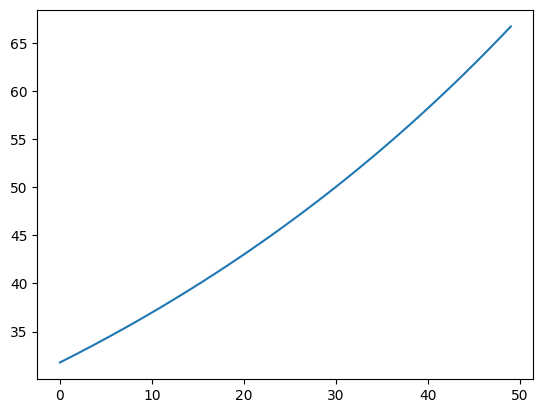

In [116]:
plt.plot(exercise_stock_prices)

(array([4., 3., 4., 3., 3., 2., 3., 3., 2., 2., 3., 2., 2., 2., 2., 2., 2.,
        2., 2., 2.]),
 array([31.7873285 , 33.53357178, 35.27981506, 37.02605834, 38.77230162,
        40.51854491, 42.26478819, 44.01103147, 45.75727475, 47.50351803,
        49.24976132, 50.9960046 , 52.74224788, 54.48849116, 56.23473445,
        57.98097773, 59.72722101, 61.47346429, 63.21970757, 64.96595086,
        66.71219414]),
 <BarContainer object of 20 artists>)

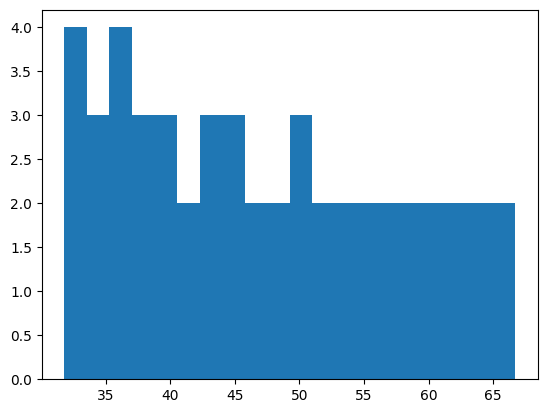

In [117]:
plt.hist(exercise_stock_prices, bins = 20)

In [118]:
# Calculate the intrinsic values for both call and put options for each final stock price
intrinsic_values_call = [max(exercise_stock_prices - strike_price, 0) for exercise_stock_prices in exercise_stock_prices]
intrinsic_values_put = [max(put_strike - exercise_stock_prices, 0) for exercise_stock_prices in exercise_stock_prices]

# Define the probabilities of reaching each final stock price (you need to determine these probabilities)
# For example, if you have an up probability of 0.5 and a down probability of 0.5 in your binomial model:
probabilities = [0.5, 0.5]

# Calculate the expected intrinsic values for both call and put options
expected_intrinsic_value_call = sum(iv * 0.5 for iv in intrinsic_values_call)
expected_intrinsic_value_put = sum(iv * 0.5 for iv in intrinsic_values_put)

# Calculate the total option value if both options are exercised today
total_option_value = expected_intrinsic_value_call + expected_intrinsic_value_put

print(f"Expected Intrinsic Value (Call): {expected_intrinsic_value_call:.2f}")
print(f"Expected Intrinsic Value (Put): {expected_intrinsic_value_put:.2f}")
print(f"Total Option Value: {total_option_value:.2f}")

Expected Intrinsic Value (Call): 616.38
Expected Intrinsic Value (Put): 0.00
Total Option Value: 616.38


In [119]:
exercise_stock_prices

array([31.7873285 , 32.27189461, 32.76384744, 33.26329961, 33.77036543,
       34.28516096, 34.80780404, 35.33841428, 35.87711316, 36.42402395,
       36.97927186, 37.54298397, 38.11528931, 38.69631887, 39.28620564,
       39.88508466, 40.49309298, 41.11036979, 41.73705636, 42.37329615,
       43.01923477, 43.67502009, 44.3408022 , 45.01673349, 45.70296869,
       46.39966485, 47.10698145, 47.82508039, 48.55412603, 49.29428524,
       50.04572744, 50.80862463, 51.58315142, 52.36948511, 53.16780566,
       53.97829582, 54.80114109, 55.63652981, 56.4846532 , 57.34570539,
       58.21988346, 59.1073875 , 60.00842066, 60.92318916, 61.8519024 ,
       62.79477295, 63.75201662, 64.72385251, 65.71050307, 66.71219414])

In [120]:
intrinsic_values_call

[9.287328495882864,
 9.77189460690925,
 10.26384744488206,
 10.763299613084392,
 11.270365431324052,
 11.785160962100292,
 12.307804037169355,
 12.838414284515068,
 13.37711315573052,
 13.924023953817183,
 14.47927186140776,
 15.042983969419318,
 15.615289306143154,
 16.196318866778157,
 16.78620564341434,
 17.385084655473435,
 17.993092980613568,
 18.610369786105018,
 19.23705636068425,
 19.87329614689356,
 20.51923477391373,
 21.175020090897085,
 21.840802200808795,
 22.516733494783978,
 23.202968687008585,
 23.899664850131984,
 24.606981451219376,
 25.32508038825228,
 26.05412602718546,
 26.79428523956865,
 27.5457274407419,
 28.308624628613096,
 29.08315142302665,
 29.869485105732288,
 30.667805660963154,
 31.478295816632468,
 32.30114108615819,
 33.136529810925275,
 33.98465320339519,
 34.84570539087262,
 35.719883459939325,
 36.60738750156541,
 37.50842065690821,
 38.423189163809305,
 39.35190240400046,
 40.294772951029046,
 41.25201661891408,
 42.223852511543996,
 43.21050307282